# One-Way Anova

When we have more than 2 groups in a column/categorical variable

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, tukey_hsd, kruskal, shapiro, levene
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
!gdown 1n9268qSj_5Q7KS_ntpv-wFPQC1UyJh6f

Downloading...
From: https://drive.google.com/uc?id=1n9268qSj_5Q7KS_ntpv-wFPQC1UyJh6f
To: C:\Users\ishan\OneDrive\Documents\GitHub\Topics-Practice\aerofit.csv

  0%|          | 0.00/7.46k [00:00<?, ?B/s]
100%|##########| 7.46k/7.46k [00:00<?, ?B/s]


In [9]:
df_aerofit = pd.read_csv('aerofit.csv')
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


Null hypothesis (H0): States that the means of all groups are equal. <br>
Alternate hypothesis (Ha): States that at least one of the means is different.

In [12]:
df_aerofit.Product.value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [13]:
KP281=df_aerofit[df_aerofit.Product=='KP281'].Income
KP481=df_aerofit[df_aerofit.Product=='KP481'].Income
KP781=df_aerofit[df_aerofit.Product=='KP781'].Income

In [15]:
astat, pval=f_oneway(KP281, KP481, KP781)
pval, pval<0.05

(1.564499131634248e-27, True)

In [19]:
sol=tukey_hsd(KP281, KP481, KP781)
print(sol)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)  -2555.625     0.410 -7283.571  2172.321
 (0 - 2) -29023.550     0.000-34384.537-23662.563
 (1 - 0)   2555.625     0.410 -2172.321  7283.571
 (1 - 2) -26467.925     0.000-32118.902-20816.948
 (2 - 0)  29023.550     0.000 23662.563 34384.537
 (2 - 1)  26467.925     0.000 20816.948 32118.902



KP281 (0) vs KP481 (1) has similar mean, KP481 (1) vs KP781 (2) has different mean, KP281 (0) vs KP781 (2) has different mean

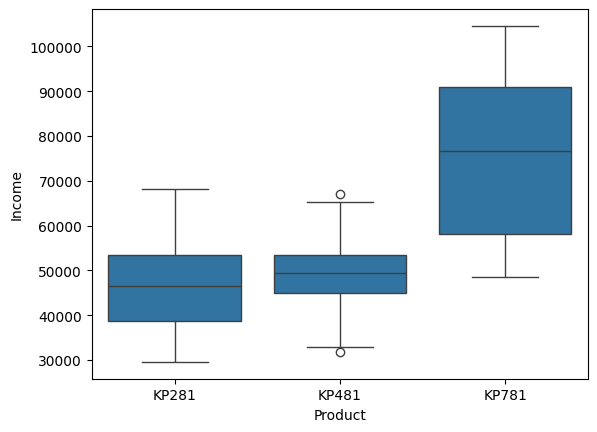

In [20]:
sns.boxplot(data=df_aerofit, y='Income', x='Product');

# Assumptions of One-way ANOVA
1. Data should be normally distributed (i.e, Gaussian)
2. Data should be independent across each record
3. Equal variance in different groups

If the Assumption fails then we will use **Kruskal-Wallis test**

Null hypothesis (H0): States that the means of all groups are equal. <br>
Alternate hypothesis (Ha): States that at least one of the means is different.

In [22]:
astat, pval=kruskal(KP281, KP481, KP781)
pval, pval<0.05

(4.562357014275808e-14, True)

Limitations of Kruskal-Wallis Test:
- Doesn't provide information about which groups differ: It only tells you if there is a difference, not which groups specifically differ.
- Less powerful than ANOVA when assumptions are met: If the data is normally distributed and has no outliers, ANOVA is more powerful.

# How to check whether the data validates the Assumption of Anova or not

1. Normality Test

In [24]:
!gdown 1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb

Downloading...
From: https://drive.google.com/uc?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb
To: C:\Users\ishan\OneDrive\Documents\GitHub\Topics-Practice\weight-height.csv

  0%|          | 0.00/428k [00:00<?, ?B/s]
100%|##########| 428k/428k [00:00<00:00, 767kB/s]
100%|##########| 428k/428k [00:00<00:00, 767kB/s]


In [25]:
df_hw = pd.read_csv('weight-height.csv')

In [26]:
df_hw

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


**QQ plot (Visualize testing for normality)**

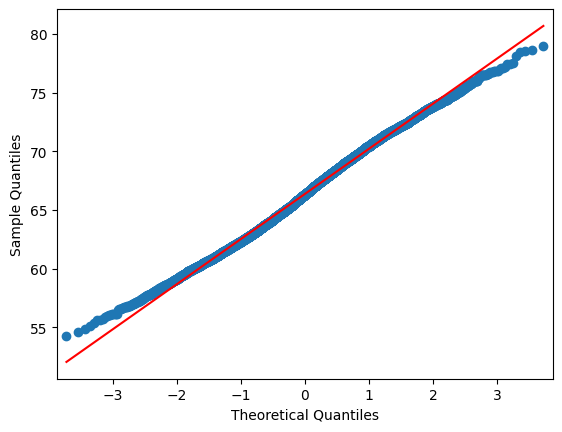

In [27]:
height = df_hw["Height"]
qqplot(height, line="s");

- If the red line is straight and the blue dots fall close to it, then your data fits the pattern well and follows a Normal Distribution.
- If the line is crooked or the dots are scattered, then your data doesn't quite fit and does not follow a Normal Distribution.

In [28]:
!gdown 1v48RRtiivufSX4ewrMaxsADK73GnN2kI

Downloading...
From: https://drive.google.com/uc?id=1v48RRtiivufSX4ewrMaxsADK73GnN2kI
To: C:\Users\ishan\OneDrive\Documents\GitHub\Topics-Practice\waiting_time.csv

  0%|          | 0.00/1.66M [00:00<?, ?B/s]
 32%|###1      | 524k/1.66M [00:00<00:00, 1.51MB/s]
 63%|######3   | 1.05M/1.66M [00:00<00:00, 1.60MB/s]
 95%|#########4| 1.57M/1.66M [00:00<00:00, 2.12MB/s]
100%|##########| 1.66M/1.66M [00:00<00:00, 1.97MB/s]


In [29]:
df_wt = pd.read_csv('waiting_time.csv')
df_wt

,time
0,184.003075
1,36.721521
2,29.970417
3,75.640285
4,61.489439
...,...
90041,135.885984
90042,15.223970
90043,207.839528
90044,140.488418


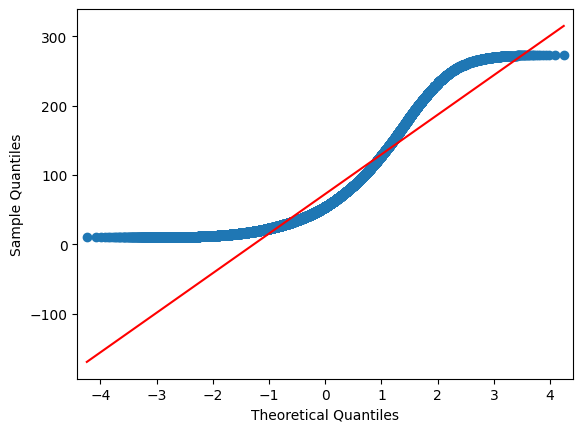

In [30]:
qqplot(df_wt["time"], line="s");

Weight does not follow a Normal Distribution

**Shapiro-Wilk test (Statistical Testing for Normality)**

- H0: Data is Gaussian
- Ha: Data is not Gaussian

In [36]:
stat, pval=shapiro(height.sample(5000)) #why sample? Bcoz, shapiro test might not be accurate if it is >5000
pval, pval<0.05

(2.611970602682664e-10, True)

In [37]:
stat, pval=shapiro(df_wt["time"].sample(5000)) #why sample? Bcoz, shapiro test might not be accurate if it is >5000
pval, pval<0.05

(2.4954580177905734e-54, True)

3. Levene (Variance Testing)

- H0: Variances are equal
- Ha: Variance are not equal

In [42]:
height_men = df_hw[df_hw["Gender"]=="Male"]["Height"]
height_women = df_hw[df_hw["Gender"]=="Female"]["Height"]

In [43]:
lstat, pval = levene(height_men, height_women)
pval, pval<0.05

(0.0004586349895436178, True)

# Two Way ANOVA

Categorial vs Categorial vs Numerical

In [44]:
!gdown 1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0

Downloading...
From: https://drive.google.com/uc?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0
To: C:\Users\ishan\OneDrive\Documents\GitHub\Topics-Practice\two_way_anova.csv

  0%|          | 0.00/1.54k [00:00<?, ?B/s]
100%|##########| 1.54k/1.54k [00:00<?, ?B/s]


In [45]:
df=pd.read_csv('two_way_anova.csv')
df.head()

,Flavour,Location,Sales
0,Orange,West,141
1,Lemon,West,178
2,Orange,West,170
3,Orange,East,76
4,Lemon,East,170


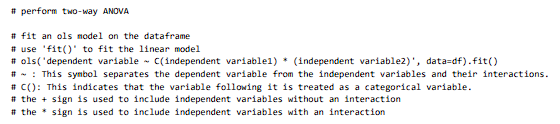

In [48]:
test = ols('Sales ~ C(Flavour) * C(Location)', data=df).fit()

In [49]:
# create a table for a 2-way ANOVA test
# Pass the linear model 'test'
# 'typ = 2' performs two-way ANOVA
anova_table = sm.stats.anova_lm(test, typ = 2)
anova_table

,sum_sq,df,F,PR(>F)
C(Flavour),6919.558981,2.0,1.968465,0.145773
C(Location),2059.273884,3.0,0.390546,0.760092
C(Flavour):C(Location),11802.257765,6.0,1.119163,0.357804
Residual,154669.016331,88.0,NaN,NaN


Brief explanation of each term represents:
1. sum_sq (Sum of Squares): It measures the variation in the dependent variable that can be attributed to the effect of the independent
variable or factor being considered.
    - In Two-Way ANOVA, you have a sum of squares for each factor (e.g., Flavour, Location) and the interaction between them.
2. df (Degrees of Freedom): It represents the number of values in the final calculation of a statistic that are free to vary.
    - In ANOVA, it's associated with the factor being tested. For example, "df" for Flavour is the number of levels of Flavour minus 1.
3. F (F-Statistic): It's a measure of the ratio of the variance between groups (explained variance) to the variance within groups (unexplained
variance).
    - A high F-value indicates a significant difference between groups, while a low F-value suggests that the groups are similar.
4. PR(>F) (p-value): This is the probability associated with the F-statistic. It indicates the likelihood that the observed differences in group
means occurred by chance.
    - A low p-value (typically less than 0.05) suggests that the factor has a significant effect, while a high p-value suggests a lack of
significance.
5. Residual: This represents the variation in the data that is not accounted for by the factors (Flavour, Location, and their interaction).
    - It is the unexplained or leftover variability after considering the effects of the specified factors.

The above table shows the summary of results from our Two-Way ANOVA analysis.
1. Flavour:
    - PR(>F) : The p-value is 0.145773, which is greater than the typical significance level of 0.05. As a result, you do not have enough evidence to reject the null hypothesis, suggesting that there is no significant effect of flavor on sales.
2. Location:
    - PR(>F) : The p-value is 0.760092, which is much greater than 0.05. Therefore, you do not have enough evidence to reject the null hypothesis, suggesting that there is no significant effect of location on sales.
3. Flavour:Location (Interaction Effect):
    - PR(>F) : The p-value is 0.357804, which is greater than 0.05. This suggests that there is no significant interaction in the effect between flavour and location on sales.
<br>Overall, the data suggests that neither the choice of flavour, the location of sale, nor their interaction significantly affect the sales of the soft
drinks.